# **Data Analysis - Retail Company**

In [ ]:
#Import
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import math
import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Mounted at /content/drive


## 1. Features Dataset



In [ ]:
#Import
final_df = pd.read_excel("/content/drive/MyDrive/Ficheiros Finais/Modelo de Classificação Final/Classification_data.xlsx")

final_df.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,Week num,PRODUTIVIDADE/HORA,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,4,1,195.0,30,8879,13,3,15.0,3
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,5,1,195.0,30,8879,13,3,15.0,3
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,6,1,195.0,30,8879,13,3,15.0,3
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,7,2,195.0,30,8879,13,3,15.0,3
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,1,2,195.0,30,8879,13,3,15.0,3


In [ ]:
# Import holidays dataset
holidays = pd.read_excel("/content/drive/MyDrive/Ficheiros Finais/Modelo de Classificação Final/Holidays_data.xlsx")
holidays.head()

,FK_LOJA,LOJA,DATA,DESCRICAO,FERIADO_FIXO,TIPO
0,POR013,Torres Vedras,2020-01-01,Dia de Ano Novo,S,ABERTO
1,POR027,Setúbal,2020-01-01,Ano Novo,S,ABERTO
2,POR434,S - Av. D. João II,2020-01-01,Ano Novo,S,ABERTO
3,POR423,S - Bento Gonçalves,2020-01-01,Ano Novo,S,ABERTO
4,POR432,S - Costa Caparica (Navegantes),2020-01-01,Ano Novo,S,ABERTO


In [ ]:
holidays = holidays.drop('FK_LOJA',axis=1)

In [ ]:
# Import events dataset
events = pd.read_excel("/content/drive/MyDrive/Ficheiros Finais/Modelo de Classificação Final/Events_data.xlsx")
events.head()

,FK_LOJA,LOJA,DATA,DESCRICAO
0,POR012,Almada Fórum,2023-01-01,Janeiro 01.23
1,POR065,Canidelo,2022-12-24,Véspera Natal
2,POR009,Coimbra,2022-11-21,IP Garrafeira
3,POR009,Coimbra,2022-11-14,IP Lácteos
4,POR062,Eiras,2022-11-14,IP Garrafeira


In [ ]:
events = events.drop('FK_LOJA',axis=1)



---



## 1.1. Clean and Create more Feature to the final Dataset

In [ ]:
final_df['DATA'] = pd.to_datetime(final_df['DATA'])
holidays['DATA'] = pd.to_datetime(holidays['DATA'])
events['DATA'] = pd.to_datetime(events['DATA'])

In [ ]:
# Merge holidays dataset with final_df
final_df = pd.merge(final_df, holidays, on=['LOJA', 'DATA'], how='left')

In [ ]:
final_df

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,...,PRODUTIVIDADE/HORA,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,DESCRICAO,FERIADO_FIXO,TIPO
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,4,...,195.0,30,8879,13,3,15.0,3,NaN,NaN,NaN
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,5,...,195.0,30,8879,13,3,15.0,3,NaN,NaN,NaN
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,6,...,195.0,30,8879,13,3,15.0,3,NaN,NaN,NaN
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,7,...,195.0,30,8879,13,3,15.0,3,NaN,NaN,NaN
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,1,...,195.0,30,8879,13,3,15.0,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94285,Alfragide,61,2023-10-26,47659,170993.519290,5756,5619,0.197571,0.151007,4,...,269.0,85,35052,26,8,13.0,2,NaN,NaN,NaN
94286,Alfragide,61,2023-10-27,63006,230833.356183,4552,4343,0.137907,0.131457,5,...,269.0,85,35052,26,8,13.0,2,NaN,NaN,NaN
94287,Alfragide,61,2023-10-28,98335,357567.292301,6128,6319,0.181560,0.132275,6,...,269.0,85,35052,26,8,13.0,2,NaN,NaN,NaN
94288,Alfragide,61,2023-10-29,79750,293165.061185,4335,4794,0.193388,0.197663,7,...,269.0,85,35052,26,8,13.0,2,NaN,NaN,NaN


> 'FERIADO' feature

In [ ]:
final_df = final_df.rename(columns={'DESCRICAO': 'FERIADO'})

In [ ]:
final_df['FERIADO'] = final_df['FERIADO'].notna().astype(int)

In [ ]:
final_df.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,...,PRODUTIVIDADE/HORA,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,TIPO
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,4,...,195.0,30,8879,13,3,15.0,3,0,NaN,NaN
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,5,...,195.0,30,8879,13,3,15.0,3,0,NaN,NaN
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,6,...,195.0,30,8879,13,3,15.0,3,0,NaN,NaN
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,7,...,195.0,30,8879,13,3,15.0,3,0,NaN,NaN
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,1,...,195.0,30,8879,13,3,15.0,3,0,NaN,NaN


In [ ]:
final_df['FERIADO_FIXO'] = final_df['FERIADO_FIXO'].replace({'S': 1})
final_df['FERIADO_FIXO'] = final_df['FERIADO_FIXO'].replace({'N': 0})
final_df['FERIADO_FIXO'] = final_df['FERIADO_FIXO'].fillna(0)

In [ ]:
final_df.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,...,PRODUTIVIDADE/HORA,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,TIPO
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,4,...,195.0,30,8879,13,3,15.0,3,0,0.0,NaN
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,5,...,195.0,30,8879,13,3,15.0,3,0,0.0,NaN
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,6,...,195.0,30,8879,13,3,15.0,3,0,0.0,NaN
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,7,...,195.0,30,8879,13,3,15.0,3,0,0.0,NaN
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,1,...,195.0,30,8879,13,3,15.0,3,0,0.0,NaN


In [ ]:
final_df['TIPO'] = final_df['TIPO'].replace({'FECHADO': 0})
final_df['TIPO'] = final_df['TIPO'].replace({'ABERTO': 1})
final_df['TIPO'] = final_df['TIPO'].fillna(1)

In [ ]:
final_df.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,...,PRODUTIVIDADE/HORA,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,TIPO
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,4,...,195.0,30,8879,13,3,15.0,3,0,0.0,1.0
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,5,...,195.0,30,8879,13,3,15.0,3,0,0.0,1.0
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,6,...,195.0,30,8879,13,3,15.0,3,0,0.0,1.0
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,7,...,195.0,30,8879,13,3,15.0,3,0,0.0,1.0
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,1,...,195.0,30,8879,13,3,15.0,3,0,0.0,1.0


In [ ]:
# Holidays with store closed with sales
final_df[final_df['TIPO'] == 0]

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,...,PRODUTIVIDADE/HORA,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,TIPO
67463,Guimarães,59,2022-01-01,2264,8091.021129,3574,2728,0.084519,0.381838,6,...,153.0,31,19248,13,7,13.0,3,1,0.0,0.0
78114,Évora,46,2020-12-25,5,7.560396,1524,1232,0.106688,0.149941,5,...,461.0,29,8927,29,14,14.5,3,1,1.0,0.0
78121,Évora,46,2021-01-01,5,33.526561,983,1431,0.129946,0.123635,5,...,461.0,29,8927,29,14,14.5,3,1,1.0,0.0
91537,Almada Fórum,68,2020-01-01,392,1178.691438,6299,5514,0.129205,0.109979,3,...,400.0,100,46951,26,6,14.5,2,1,1.0,0.0
91896,Almada Fórum,68,2020-12-25,11,11.784039,8333,7873,0.180477,0.198495,5,...,400.0,100,46951,26,6,14.5,2,1,1.0,0.0
91903,Almada Fórum,68,2021-01-01,22,105.175062,9091,5404,0.185681,0.120703,5,...,400.0,100,46951,26,6,14.5,2,1,1.0,0.0


In [ ]:
# Remove holidays that the store is closed
final_df = final_df[final_df['TIPO'] == 1]

> 'EVENTO' feature

In [ ]:
# Merge Events dataset with final_df
final_df = pd.merge(final_df, events, on=['LOJA', 'DATA'], how='left')
final_df = final_df.rename(columns={'DESCRICAO': 'EVENTO'})
final_df['EVENTO'] = final_df['EVENTO'].notna().astype(int)

In [ ]:
final_df.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,Weekday,...,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,TIPO,EVENTO
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,4,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,5,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,6,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,7,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,1,...,30,8879,13,3,15.0,3,0,0.0,1.0,0


> 'DAYTYPE' and 'ABERTO' feature

In [ ]:
# Create feature of Weekend (Friday to Sunday) vs Weekday (Monday to Thursday)
substituicao = {1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1}

final_df['Weekday'] = final_df['Weekday'].replace(substituicao)

In [ ]:
final_df = final_df.rename(columns={'Weekday': 'DAYTYPE'})
final_df = final_df.rename(columns={'TIPO': 'ABERTO'})

In [ ]:
final_df.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,...,N_COLABORADORES,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,ABERTO,EVENTO
0,Viseu,45,2020-01-02,32709,108710.361032,1625,1090,0.128914,0.103158,0,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
1,Viseu,45,2020-01-03,31522,103973.955446,1136,1185,0.149206,0.187527,1,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
2,Viseu,45,2020-01-04,37954,117317.685832,1525,1335,0.188920,0.161014,1,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,1,...,30,8879,13,3,15.0,3,0,0.0,1.0,0
4,Viseu,45,2020-01-06,25738,68824.244078,1378,1477,0.087196,0.395187,0,...,30,8879,13,3,15.0,3,0,0.0,1.0,0


> 'Var_Itens_+' and 'Var_Itens_-' features

In [ ]:
# Create new feature: Percentage of number of itens that increase price in that day
final_df['Var_Itens_+'] = final_df['SKUS_+'] / final_df['SKUS']

In [ ]:
# Create new feature: Percentage of number of itens that decrease price in that day
final_df['Var_Itens_-'] = final_df['SKUS_-'] / final_df['SKUS']

In [ ]:
final_df1 = final_df

>  'Combined Avg Mean week before' feature

In [ ]:
final_df1['Previous Date'] = final_df1['DATA'] - pd.Timedelta(days=7)

In [ ]:
final_df1.drop('DATA', axis = 1)

,LOJA,Index_loja,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,Week num,...,SELF CHECKOUTS,Open Hours,Cluster,FERIADO,FERIADO_FIXO,ABERTO,EVENTO,Var_Itens_+,Var_Itens_-,Previous Date
0,Viseu,45,32709,108710.361032,1625,1090,0.128914,0.103158,0,1,...,3,15.0,3,0,0.0,1.0,0,0.183016,0.122762,2019-12-26
1,Viseu,45,31522,103973.955446,1136,1185,0.149206,0.187527,1,1,...,3,15.0,3,0,0.0,1.0,0,0.127942,0.133461,2019-12-27
2,Viseu,45,37954,117317.685832,1525,1335,0.188920,0.161014,1,1,...,3,15.0,3,0,0.0,1.0,0,0.171754,0.150355,2019-12-28
3,Viseu,45,33814,109862.214392,891,1581,0.025823,0.329246,1,2,...,3,15.0,3,0,0.0,1.0,0,0.100349,0.178061,2019-12-29
4,Viseu,45,25738,68824.244078,1378,1477,0.087196,0.395187,0,2,...,3,15.0,3,0,0.0,1.0,0,0.155198,0.166348,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94297,Alfragide,61,47659,170993.519290,5756,5619,0.197571,0.151007,0,43,...,8,13.0,2,0,0.0,1.0,0,0.164213,0.160305,2023-10-19
94298,Alfragide,61,63006,230833.356183,4552,4343,0.137907,0.131457,1,43,...,8,13.0,2,0,0.0,1.0,0,0.129864,0.123902,2023-10-20
94299,Alfragide,61,98335,357567.292301,6128,6319,0.181560,0.132275,1,43,...,8,13.0,2,0,0.0,1.0,0,0.174826,0.180275,2023-10-21
94300,Alfragide,61,79750,293165.061185,4335,4794,0.193388,0.197663,1,44,...,8,13.0,2,0,0.0,1.0,0,0.123673,0.136768,2023-10-22


In [ ]:
def calculate(df):
    # Calcula a média móvel dos últimos 4 dias úteis
    avg_4_weekdays_week_before = df[df['DAYTYPE'] == 0]['VALOR'].rolling(8, min_periods=4).apply(lambda x: np.mean(x[:4]), raw=True)

    # Calcula a média móvel dos últimos 3 dias de fim de semana
    avg_3_weekend_week_before = df[df['DAYTYPE'] == 1]['VALOR'].rolling(4, min_periods=3).apply(lambda x: np.mean(x[:3]), raw=True)

    # Combina os resultados nas colunas 'Combined Avg Mean week before'
    df.loc[df['DAYTYPE'] == 0, 'Combined Avg Mean week before'] = avg_4_weekdays_week_before
    df.loc[df['DAYTYPE'] == 1, 'Combined Avg Mean week before'] = avg_3_weekend_week_before

    return df

# Aplica a função por grupo
final_df1 = final_df1.groupby('LOJA', group_keys=False).apply(calculate)

In [ ]:
final_df1.dropna(axis=0, inplace=True)

In [ ]:
final_df1.isnull().sum()

LOJA                             0
Index_loja                       0
DATA                             0
ITENS                            0
VALOR                            0
SKUS_+                           0
SKUS_-                           0
VAR_PREÇO_+                      0
VAR_PREÇO_-                      0
DAYTYPE                          0
Week num                         0
PRODUTIVIDADE/HORA               0
N_COLABORADORES                  0
SKUS                             0
CAIXAS TRADICIONAIS              0
SELF CHECKOUTS                   0
Open Hours                       0
Cluster                          0
FERIADO                          0
FERIADO_FIXO                     0
ABERTO                           0
EVENTO                           0
Var_Itens_+                      0
Var_Itens_-                      0
Previous Date                    0
Combined Avg Mean week before    0
dtype: int64

In [ ]:
final_df1.drop('Previous Date', axis = 1, inplace=True)

> One Hot Enconding (Cluster and Months)

In [ ]:
# One hot encoding for Clusters
cluster_encoded = pd.get_dummies(final_df1['Cluster'], prefix='Cluster')

final_df1 = pd.concat([final_df1, cluster_encoded], axis=1)

In [ ]:
# One hot encoding for each month
months_encoded = pd.get_dummies(final_df1['DATA'].dt.month, prefix='Month')

final_df1 = pd.concat([final_df1, months_encoded], axis=1)

In [ ]:
final_df1.head()

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,1,...,0,0,0,0,0,0,0,0,0,0
6,Viseu,45,2020-01-08,22535,67749.692272,929,1073,0.119168,0.192171,0,...,0,0,0,0,0,0,0,0,0,0
7,Viseu,45,2020-01-09,22926,63819.583059,1655,1200,0.156033,0.103452,0,...,0,0,0,0,0,0,0,0,0,0
8,Viseu,45,2020-01-10,29498,72166.496162,1562,1021,0.137873,0.110101,1,...,0,0,0,0,0,0,0,0,0,0
9,Viseu,45,2020-01-11,42378,110485.607747,1245,1072,0.165308,0.122310,1,...,0,0,0,0,0,0,0,0,0,0




---



## 1.3. Create Label Column

In [ ]:
# Create label column
median_sales_store = final_df1.groupby('Index_loja')['VALOR'].median()

final_df1['Above median'] = final_df1.apply(lambda row: 1 if row['VALOR'] > median_sales_store[row['Index_loja']] else 0, axis=1)

In [ ]:
final_df1.head(5)

,LOJA,Index_loja,DATA,ITENS,VALOR,SKUS_+,SKUS_-,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Above median
3,Viseu,45,2020-01-05,33814,109862.214392,891,1581,0.025823,0.329246,1,...,0,0,0,0,0,0,0,0,0,1
6,Viseu,45,2020-01-08,22535,67749.692272,929,1073,0.119168,0.192171,0,...,0,0,0,0,0,0,0,0,0,0
7,Viseu,45,2020-01-09,22926,63819.583059,1655,1200,0.156033,0.103452,0,...,0,0,0,0,0,0,0,0,0,0
8,Viseu,45,2020-01-10,29498,72166.496162,1562,1021,0.137873,0.110101,1,...,0,0,0,0,0,0,0,0,0,0
9,Viseu,45,2020-01-11,42378,110485.607747,1245,1072,0.165308,0.122310,1,...,0,0,0,0,0,0,0,0,0,1




---



## 1.4. Final Feature Dataset

In [ ]:
# Drop columns that are not features for our problem
features_df = final_df1.drop(['LOJA', 'Index_loja', 'SKUS_+', 'SKUS_-', 'DATA','ITENS', 'N_COLABORADORES', 'VALOR','FERIADO_FIXO', 'Week num', 'ABERTO', 'Cluster'], axis=1)

In [ ]:
features_df.head()

,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,PRODUTIVIDADE/HORA,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,FERIADO,EVENTO,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Above median
3,0.025823,0.329246,1,195.0,8879,13,3,15.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0.119168,0.192171,0,195.0,8879,13,3,15.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.156033,0.103452,0,195.0,8879,13,3,15.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.137873,0.110101,1,195.0,8879,13,3,15.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.165308,0.122310,1,195.0,8879,13,3,15.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
features_df.isnull().sum()

VAR_PREÇO_+                      0
VAR_PREÇO_-                      0
DAYTYPE                          0
PRODUTIVIDADE/HORA               0
SKUS                             0
CAIXAS TRADICIONAIS              0
SELF CHECKOUTS                   0
Open Hours                       0
FERIADO                          0
EVENTO                           0
Var_Itens_+                      0
Var_Itens_-                      0
Combined Avg Mean week before    0
Cluster_0                        0
Cluster_1                        0
Cluster_2                        0
Cluster_3                        0
Month_1                          0
Month_2                          0
Month_3                          0
Month_4                          0
Month_5                          0
Month_6                          0
Month_7                          0
Month_8                          0
Month_9                          0
Month_10                         0
Month_11                         0
Month_12            



---



## 1.5. Exploratory data analysis - Features dataset

In [ ]:
features_df.iloc[:,:-1].describe()

,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,PRODUTIVIDADE/HORA,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,FERIADO,EVENTO,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,...,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000,93952.000000
mean,0.136427,0.185755,0.427506,199.530427,11201.720219,14.944578,3.197686,13.354431,0.011612,0.002970,...,0.087811,0.085682,0.088247,0.087523,0.091068,0.088928,0.088130,0.090301,0.065778,0.065863
std,0.043653,0.094134,0.494719,81.468857,13511.857142,6.829721,5.253305,1.527177,0.107134,0.054413,...,0.283021,0.279895,0.283656,0.282602,0.287707,0.284642,0.283486,0.286615,0.247895,0.248045
min,0.010007,0.100003,0.000000,85.000000,2523.000000,3.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112557,0.129031,0.000000,136.000000,2990.000000,12.000000,0.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.141437,0.158360,0.000000,179.000000,3364.000000,15.000000,0.000000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.170574,0.187513,1.000000,229.000000,15101.000000,17.000000,4.000000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.199999,0.499962,1.000000,461.000000,48810.000000,50.000000,26.000000,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("For our classification model we will use {} features, including the enconded months and clusters.".format( features_df.iloc[:,:-1].shape[1]))

For our classification model we will use 29 features, including the enconded months and clusters.


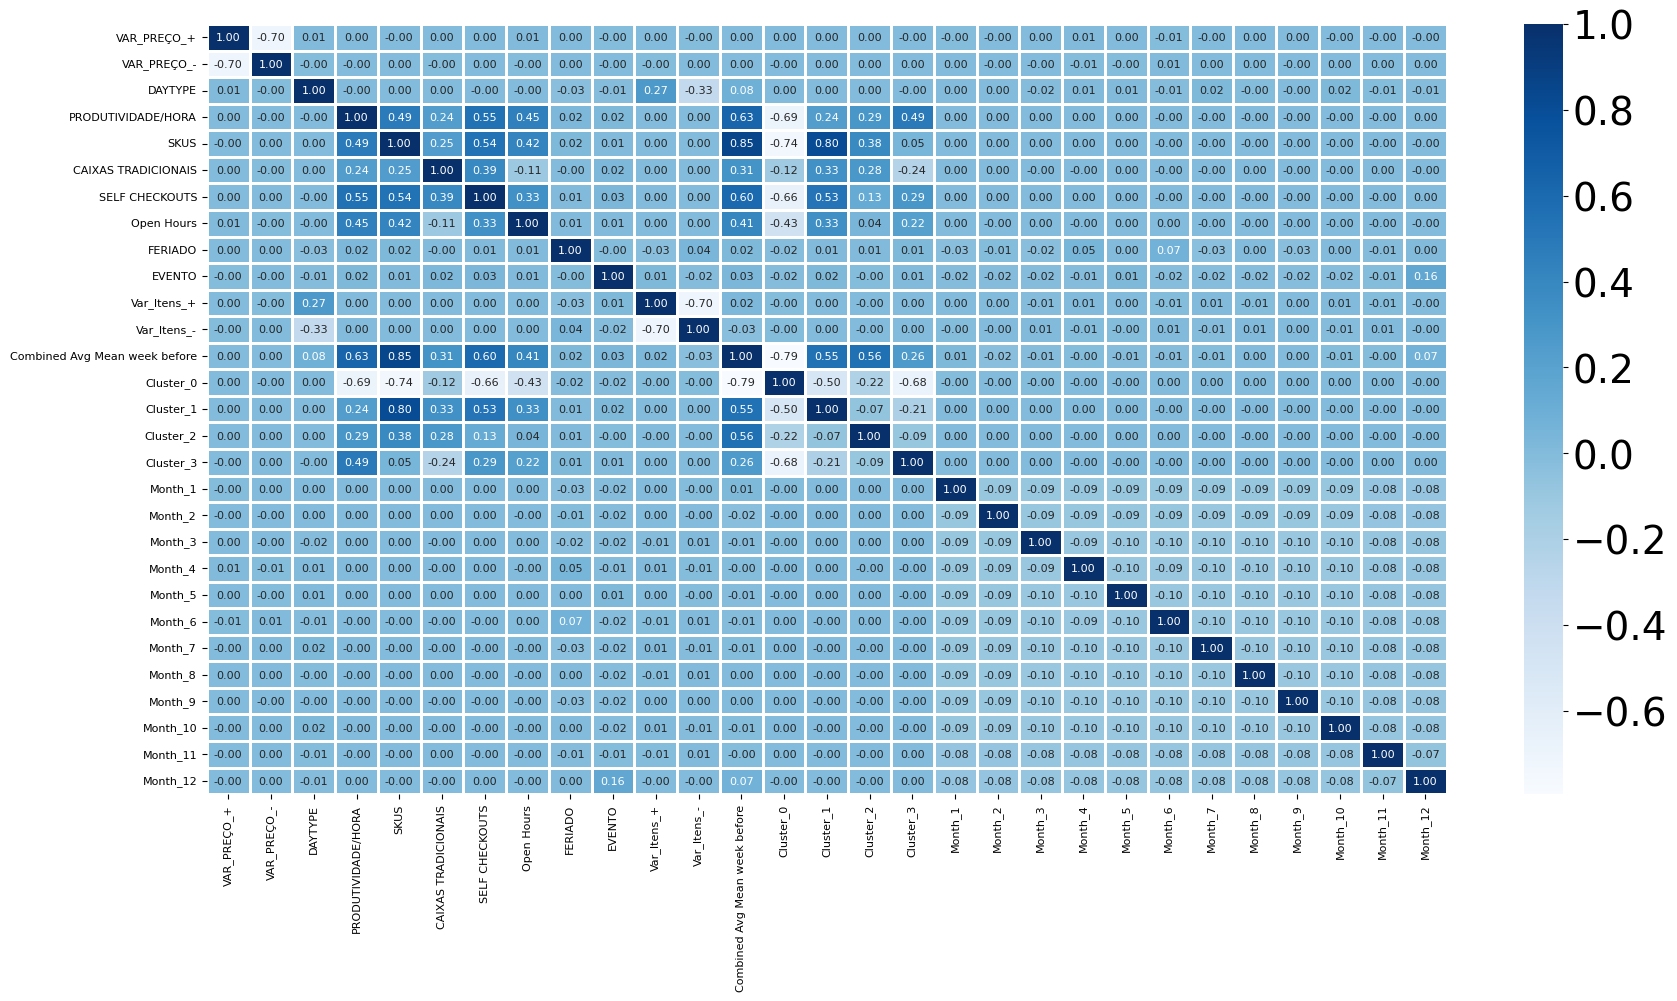

In [ ]:
# Heatmap of the Features dataset
fig, ax = plt.subplots(figsize=(20, 10))

heatmap = sns.heatmap(features_df.iloc[:,:-1].corr(), annot=True, fmt='1.2f', annot_kws={'size': 8}, cmap='Blues', linewidth=1)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

plt.show()

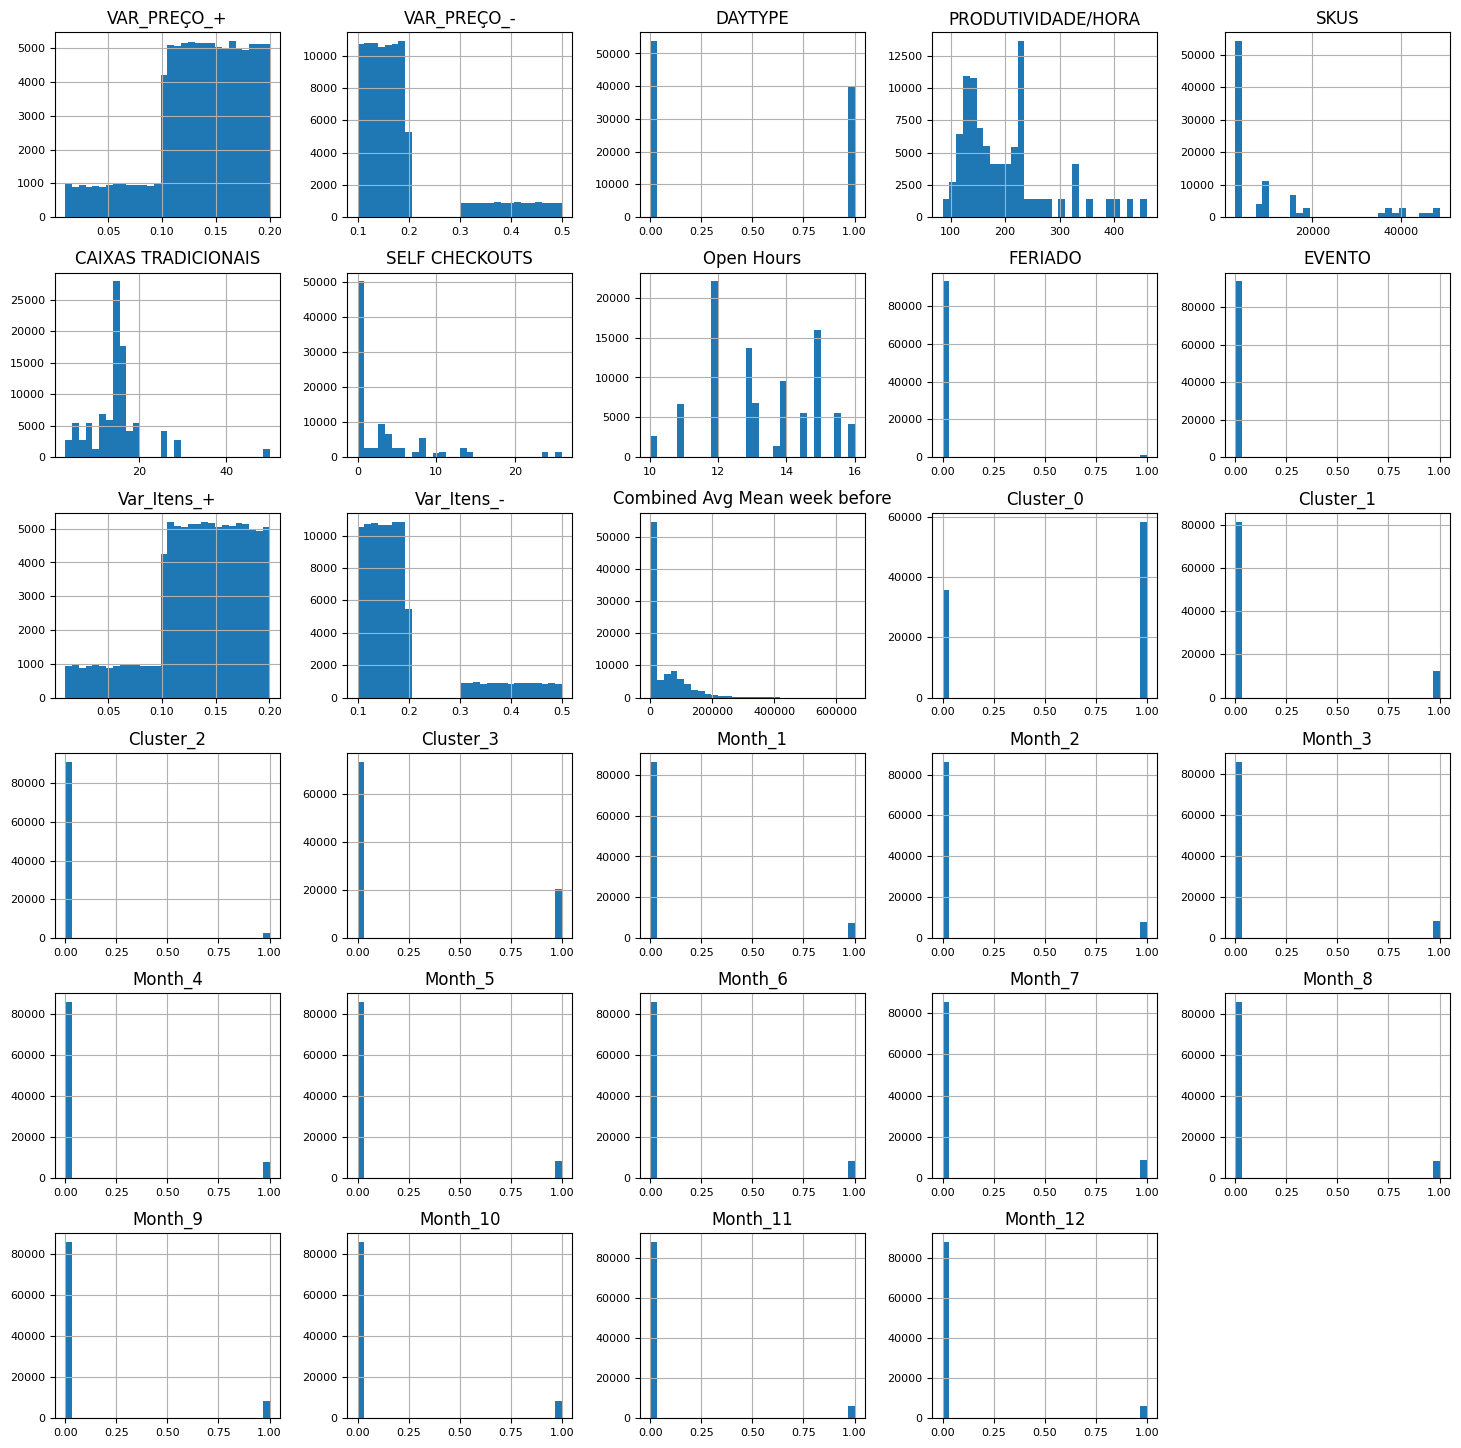

In [ ]:
# Histograms of the Features dataset
hist = features_df.iloc[:,:-1].hist(bins=30, figsize=(18,18), layout=(6, 5))

for ax in hist.flatten():
    ax.title.set_size(12)
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(8)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(8)

plt.show()

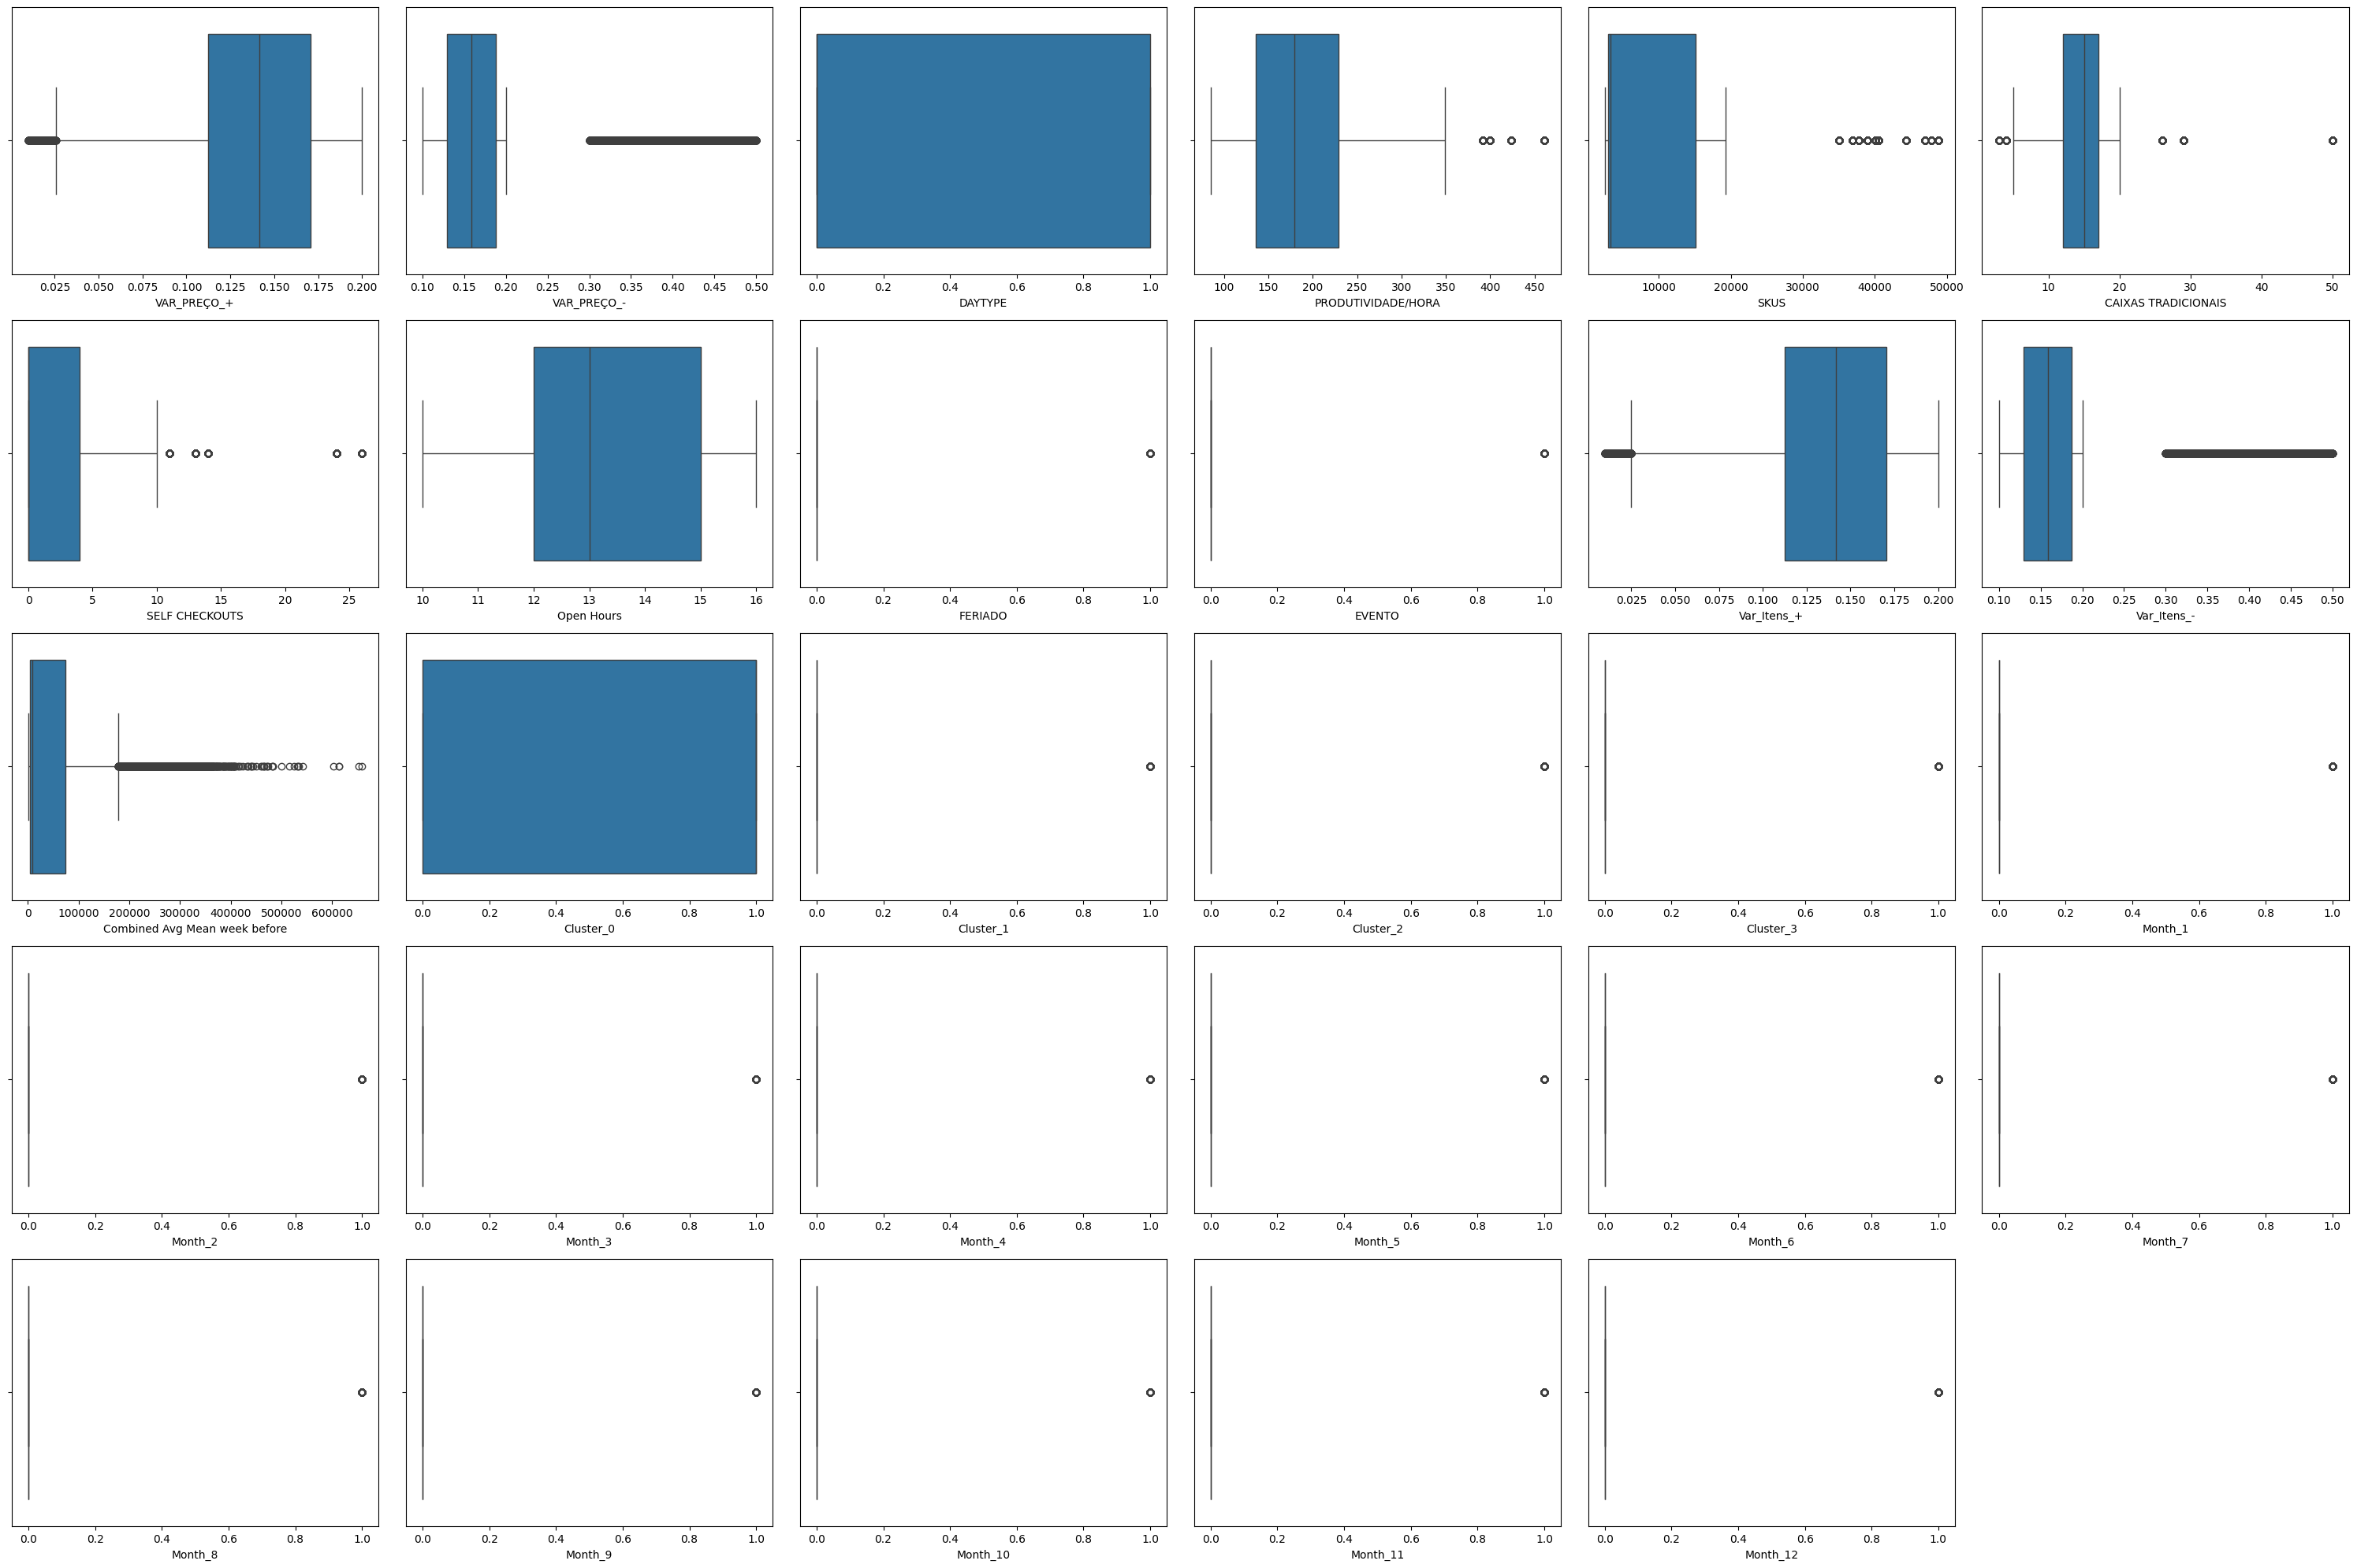

In [ ]:
# Boxplot of the Features dataset
plt.figure(figsize=(30, 20))

for i, column in enumerate(features_df.columns[:-1]):
    plt.subplot(5, 6, i+1)
    sns.boxplot(x=features_df[column], width=0.8)

plt.tight_layout()
plt.show()

In [ ]:
"""# Violin plot of the Features '7-day moving average'
plt.figure(figsize=(30, 10))
sns.violinplot(x=features_df.iloc[:,:14]['7-day moving average'], palette='Blues')
plt.show()"""

"# Violin plot of the Features '7-day moving average'\nplt.figure(figsize=(30, 10))\nsns.violinplot(x=features_df.iloc[:,:14]['7-day moving average'], palette='Blues')\nplt.show()"

In [ ]:
"""# Pair plotof the Features dataset
sns.pairplot(features_df.iloc[:,:14], hue='Above median', palette='Blues')"""

"# Pair plotof the Features dataset\nsns.pairplot(features_df.iloc[:,:14], hue='Above median', palette='Blues')"



---



## 2. Preprocessing Data to implement models of machine learning

## 2.1. Scalling with Standardization (z-score)

In [ ]:
scaler = StandardScaler()

features_df_scaled = scaler.fit_transform(features_df.iloc[:,:-1])

In [ ]:
features_df_scaled_df = pd.DataFrame(features_df_scaled, columns=features_df.iloc[:,:-1].columns)

In [ ]:
features_df_scaled_df

,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,PRODUTIVIDADE/HORA,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,FERIADO,EVENTO,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-2.533676,1.524328,1.157217,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
1,-0.395354,0.068158,-0.864142,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
2,0.449143,-0.874326,-0.864142,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
3,0.033133,-0.803690,1.157217,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
4,0.661604,-0.673998,1.157217,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93947,1.400688,-0.369142,-0.864142,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532
93948,0.033915,-0.576819,1.157217,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532
93949,1.033907,-0.568133,1.157217,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532
93950,1.304869,0.126494,1.157217,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532


In [ ]:
#features_df_scaled_df.to_excel('/content/drive/MyDrive/EDIT/Ficheiros Finais/Modelo de Classificação Final/Scaled_feaatures_data.xlsx', index=True)



---



## 2.2. Exploratory data analysis - Scaled Dataset

In [ ]:
features_df_scaled_df.describe()

,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,PRODUTIVIDADE/HORA,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,FERIADO,EVENTO,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,...,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04,9.395200e+04
mean,-5.913375e-16,-7.086369e-17,-8.753972e-18,2.323300e-16,9.680419e-18,5.808251e-17,-9.680419e-17,1.242724e-15,3.736037e-17,6.050262e-18,...,2.722618e-18,5.887661e-17,5.324230e-17,-4.609543e-17,4.378877e-17,1.270555e-16,6.337649e-17,6.904861e-17,3.902419e-17,5.883880e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.895991e+00,-9.109664e-01,-8.641422e-01,-1.405826e+00,-6.423074e-01,-1.748921e+00,-6.087032e-01,-2.196503e+00,-1.083916e-01,-5.457514e-02,...,-3.102641e-01,-3.061232e-01,-3.111085e-01,-3.097072e-01,-3.165313e-01,-3.124237e-01,-3.108821e-01,-3.150638e-01,-2.653483e-01,-2.655320e-01
25%,-5.467923e-01,-6.025985e-01,-8.641422e-01,-7.798166e-01,-6.077450e-01,-4.311441e-01,-6.087032e-01,-8.868900e-01,-1.083916e-01,-5.457514e-02,...,-3.102641e-01,-3.061232e-01,-3.111085e-01,-3.097072e-01,-3.165313e-01,-3.124237e-01,-3.108821e-01,-3.150638e-01,-2.653483e-01,-2.655320e-01
50%,1.147715e-01,-2.910247e-01,-8.641422e-01,-2.520047e-01,-5.800655e-01,8.114858e-03,-6.087032e-01,-2.320837e-01,-1.083916e-01,-5.457514e-02,...,-3.102641e-01,-3.061232e-01,-3.111085e-01,-3.097072e-01,-3.165313e-01,-3.124237e-01,-3.108821e-01,-3.150638e-01,-2.653483e-01,-2.655320e-01
75%,7.822316e-01,1.867187e-02,1.157217e+00,3.617300e-01,2.885836e-01,3.009542e-01,1.527264e-01,1.077529e+00,-1.083916e-01,-5.457514e-02,...,-3.102641e-01,-3.061232e-01,-3.111085e-01,-3.097072e-01,-3.165313e-01,-3.124237e-01,-3.108821e-01,-3.150638e-01,-2.653483e-01,-2.655320e-01
max,1.456312e+00,3.337888e+00,1.157217e+00,3.209459e+00,2.783369e+00,5.132803e+00,4.340589e+00,1.732335e+00,9.225806e+00,1.832336e+01,...,3.223061e+00,3.266658e+00,3.214313e+00,3.228856e+00,3.159246e+00,3.200782e+00,3.216654e+00,3.173960e+00,3.768632e+00,3.766024e+00


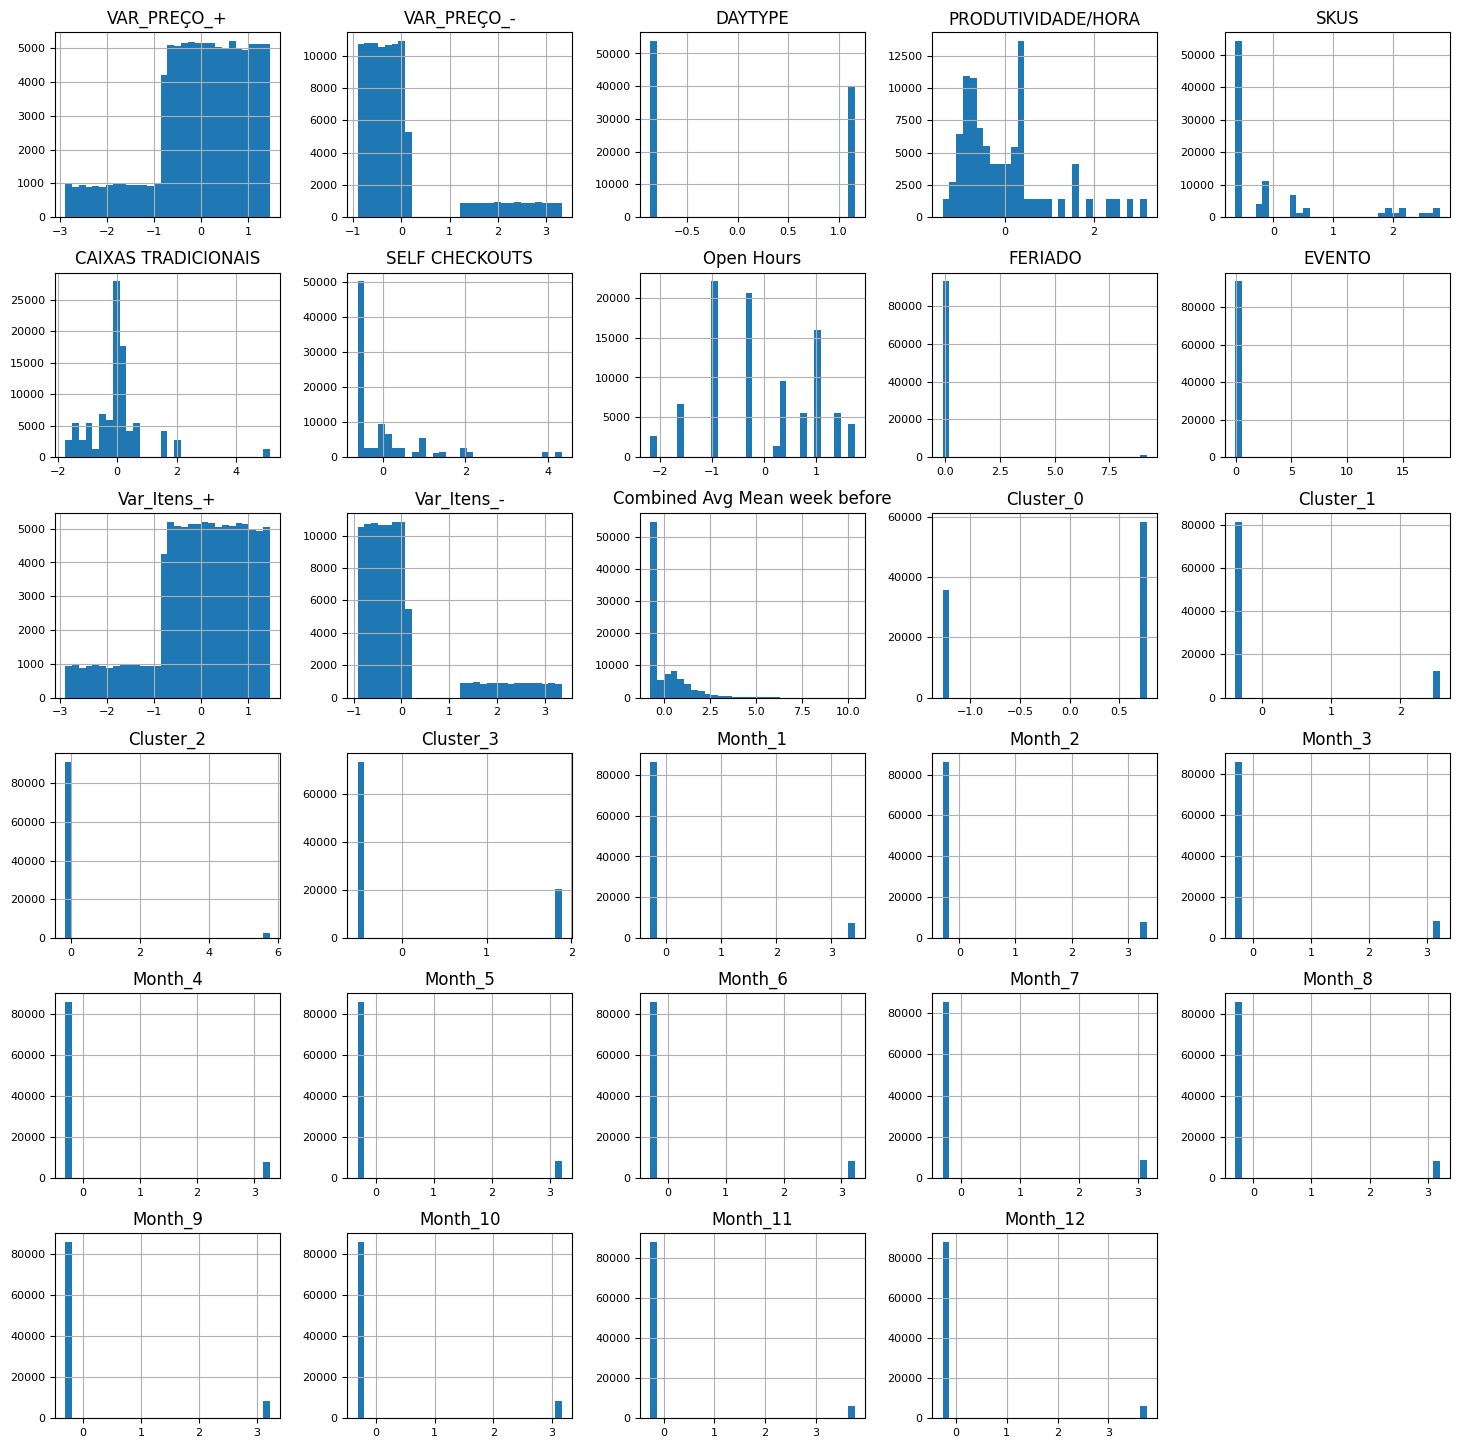

In [ ]:
# Histograms of the Features dataset
hist = features_df_scaled_df.hist(bins=30, figsize=(18,18), layout=(6, 5))

for ax in hist.flatten():
    ax.title.set_size(12)
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(8)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(8)

plt.show()

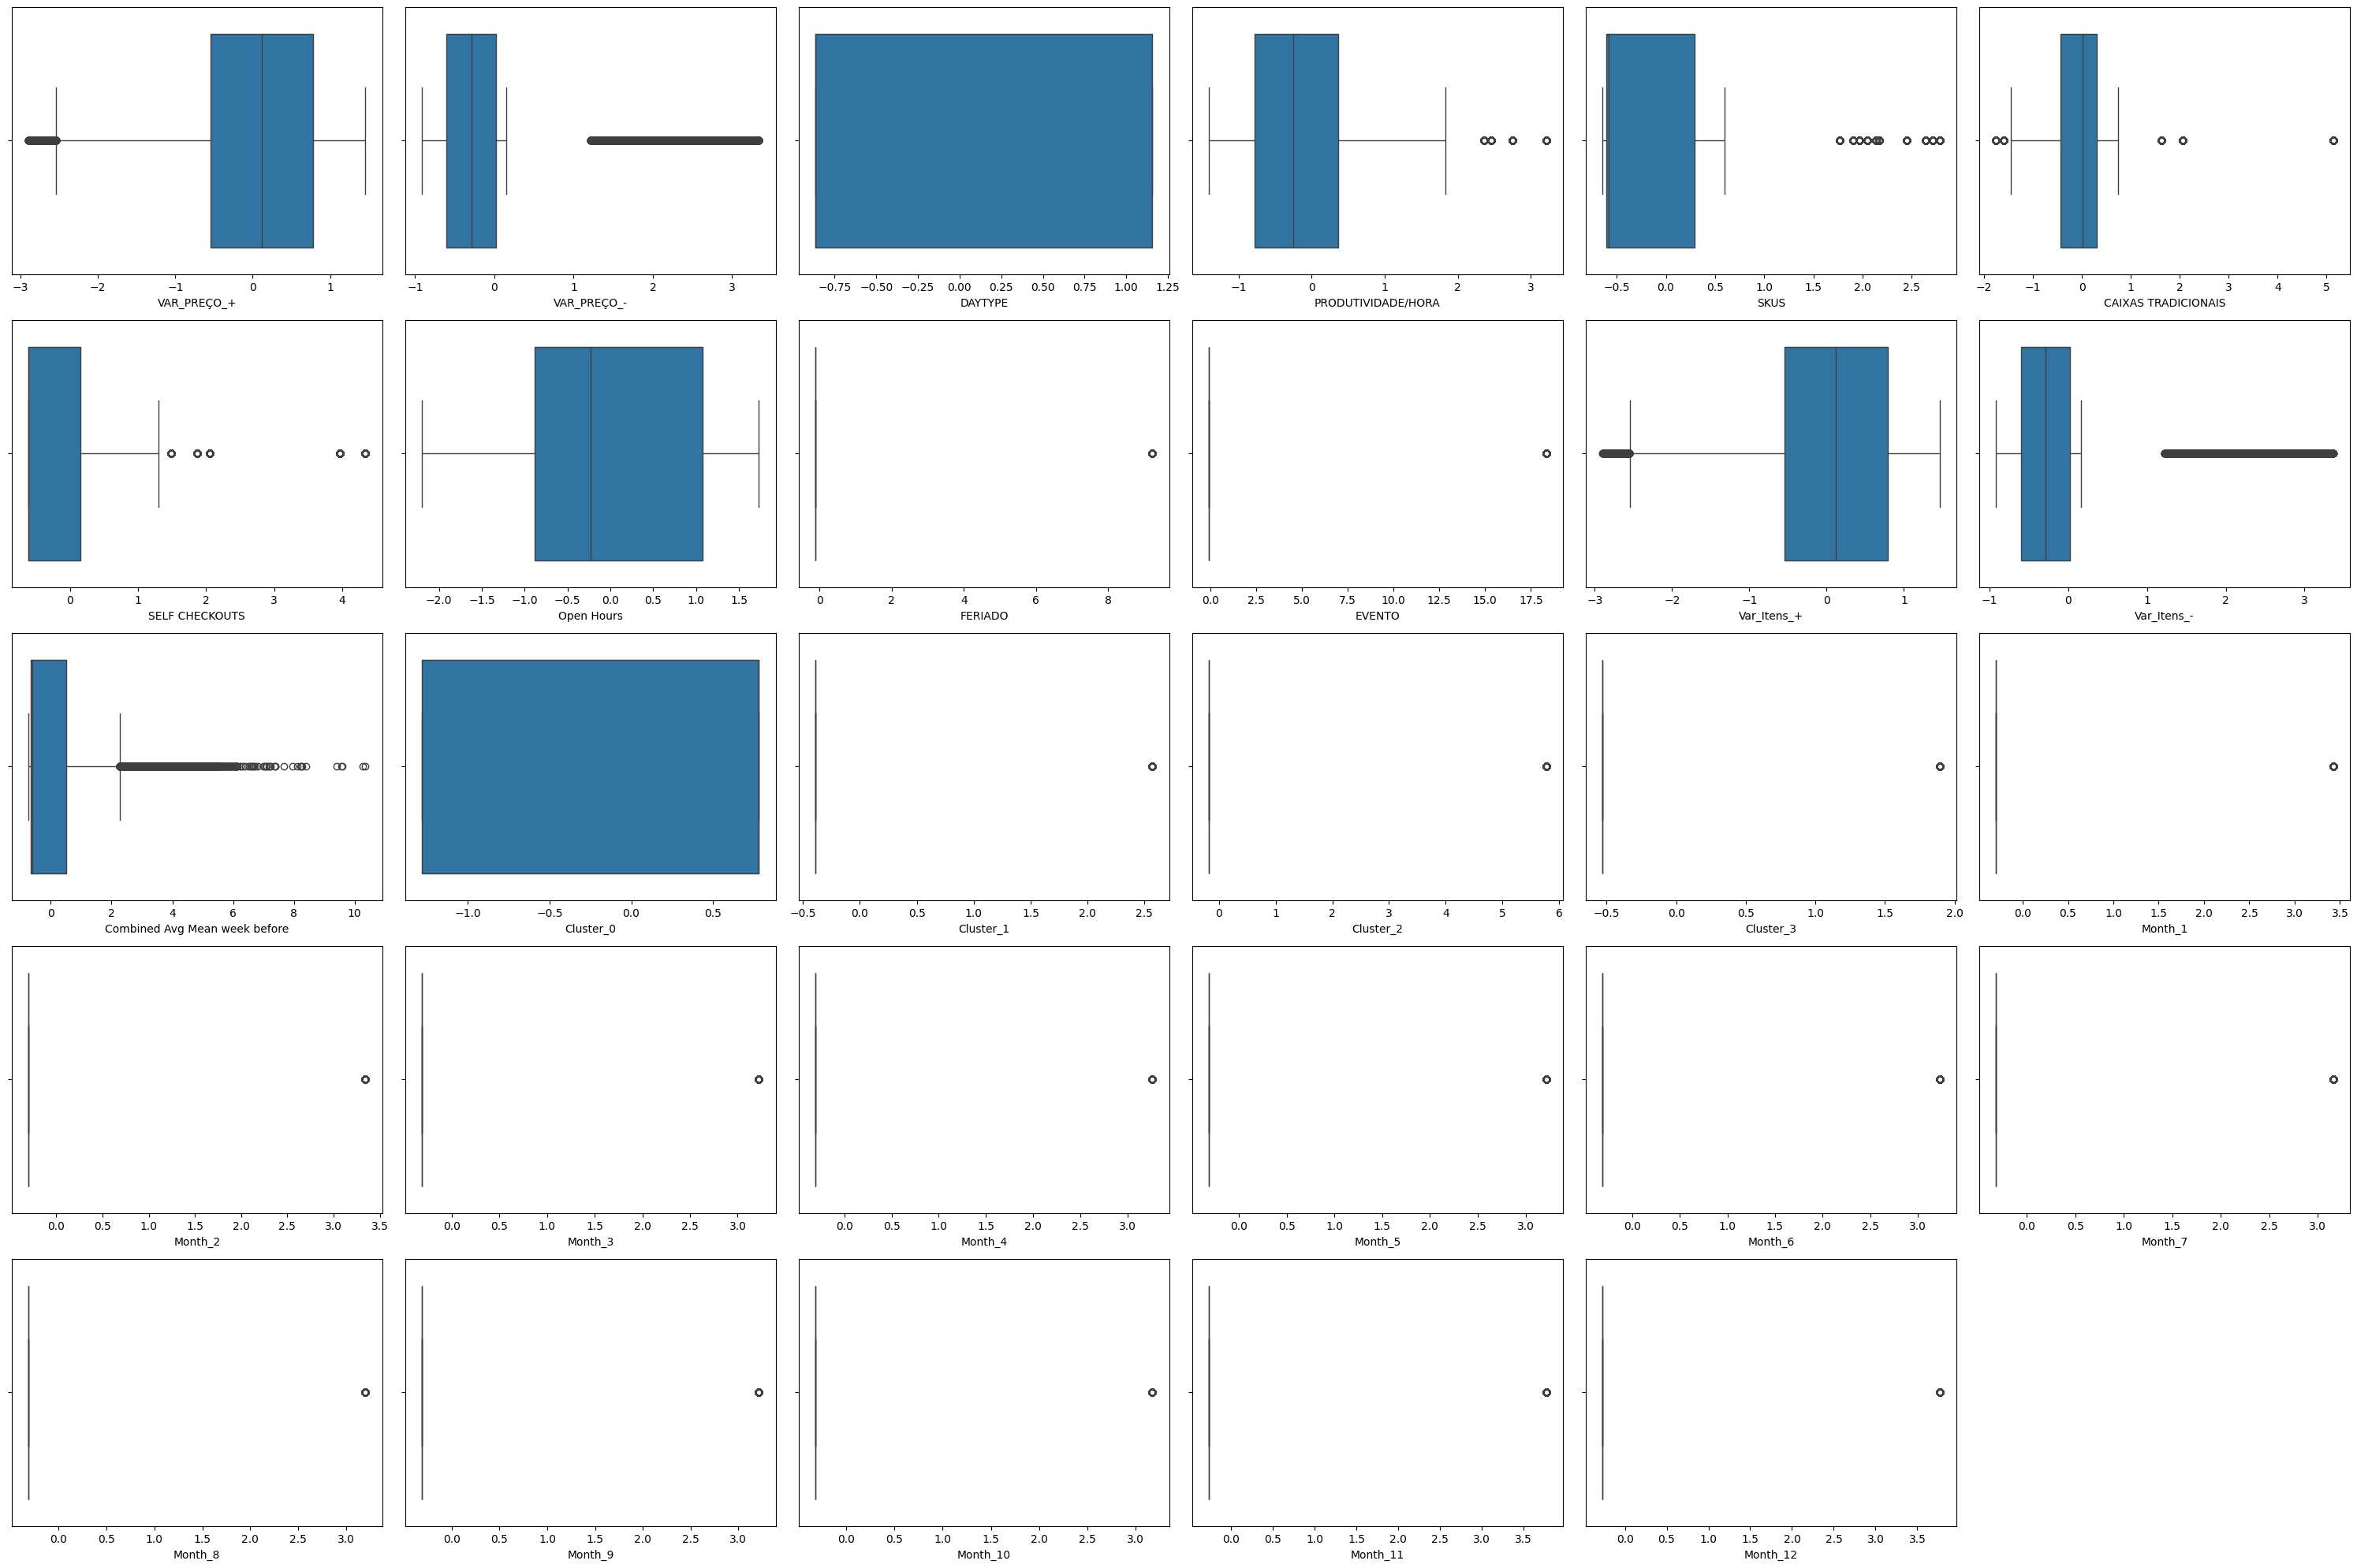

In [ ]:
# Boxplot of the Features dataset
plt.figure(figsize=(30, 20))

for i, column in enumerate(features_df_scaled_df.columns):
    plt.subplot(5, 6, i+1)
    sns.boxplot(x=features_df_scaled_df[column], width=0.8)

plt.tight_layout()
plt.show()



---



## 2.3. Split Data Train and Test

In [ ]:
X = features_df_scaled_df

In [ ]:
X

,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,PRODUTIVIDADE/HORA,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,FERIADO,EVENTO,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-2.533676,1.524328,1.157217,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
1,-0.395354,0.068158,-0.864142,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
2,0.449143,-0.874326,-0.864142,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
3,0.033133,-0.803690,1.157217,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
4,0.661604,-0.673998,1.157217,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93947,1.400688,-0.369142,-0.864142,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532
93948,0.033915,-0.576819,1.157217,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532
93949,1.033907,-0.568133,1.157217,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532
93950,1.304869,0.126494,1.157217,0.852718,1.765146,1.618731,0.914156,-0.232084,-0.108392,-0.054575,...,-0.310264,-0.306123,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532


In [ ]:
y = features_df.iloc[:, -1]

In [ ]:
y

3        1
6        0
7        0
8        0
9        1
        ..
94297    0
94298    1
94299    1
94300    1
94301    1
Name: Above median, Length: 93952, dtype: int64

In [ ]:
# Random split into train (70%) and rest (30%)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)

# Random split the rest into validation (50%) and test (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Verificar o tamanho de cada conjunto de dados
print("Size Train Set:", len(X_train))
print("Size Validation Set:", len(X_valid))
print("Size Test Set:", len(X_test))

Size Train Set: 65766
Size Validation Set: 14093
Size Test Set: 14093




---



## 3. Implementing Algorithms

## 3.1. Decision Tree Classifier Algorithm

In [ ]:
model_DTC = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit Decision Tree Classifier Algorithm
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions of the Decision Tree Classifier Algorithm
predictions_DTC = model_DTC.predict(X_valid)

# Accuracies of the Decision Tree Classifier Algorithm
acuracy_DTC = accuracy_score(y_valid, predictions_DTC)
print("Acuracy of the Decision Tree Classifier Algorithm:", acuracy_DTC)
print(classification_report(y_valid, predictions_DTC))

Acuracy of the Decision Tree Classifier Algorithm: 0.6819697722273469
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7033
           1       0.68      0.68      0.68      7060

    accuracy                           0.68     14093
   macro avg       0.68      0.68      0.68     14093
weighted avg       0.68      0.68      0.68     14093



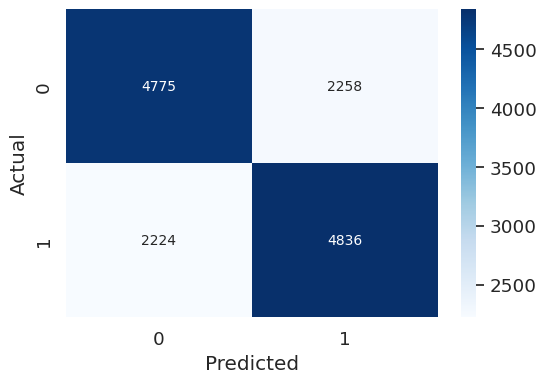

In [ ]:
# Confusion Matrix of the Decision Tree Classifier Algorithm
data = confusion_matrix(y_valid, predictions_DTC)
df_cm = pd.DataFrame(data, columns=np.unique(y_valid), index = np.unique(y_valid))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt='d')
plt.show()

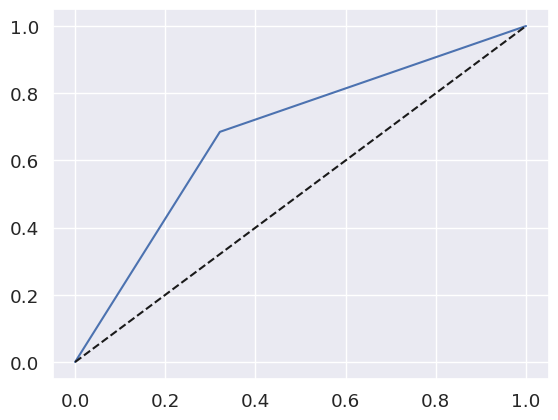

AUC Decision Tree Classifier: 0.6819639828264084


In [ ]:
# ROC Curve and Accuracy graph of the Decision Tree Classifier Algorithm
fpr, tpr, thresholds = metrics.roc_curve(y_valid, predictions_DTC, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# Print AUC
auc_DTC = np.trapz(tpr,fpr)
print('AUC Decision Tree Classifier:', auc_DTC)



---



## 3.2. Features importance

In [ ]:
# Features importances of the Decision Tree Classifier Model
imp = list(zip(X_train, model_DTC.feature_importances_))

imp_sorted = sorted(imp, key=lambda x: x[1], reverse=True)
for feature, importance in imp_sorted:
    print(f'{feature}: {importance:.4f}')

Combined Avg Mean week before: 0.2350
Var_Itens_+: 0.1067
VAR_PREÇO_-: 0.1055
Var_Itens_-: 0.1039
VAR_PREÇO_+: 0.1002
DAYTYPE: 0.0517
SKUS: 0.0453
PRODUTIVIDADE/HORA: 0.0419
Month_12: 0.0351
SELF CHECKOUTS: 0.0316
CAIXAS TRADICIONAIS: 0.0231
Month_8: 0.0217
Open Hours: 0.0156
Month_1: 0.0088
Month_4: 0.0088
Month_3: 0.0080
Month_2: 0.0077
Month_7: 0.0076
Month_6: 0.0075
Month_11: 0.0069
Month_9: 0.0065
Month_5: 0.0054
FERIADO: 0.0052
Month_10: 0.0050
Cluster_3: 0.0024
Cluster_1: 0.0016
EVENTO: 0.0006
Cluster_0: 0.0005
Cluster_2: 0.0001


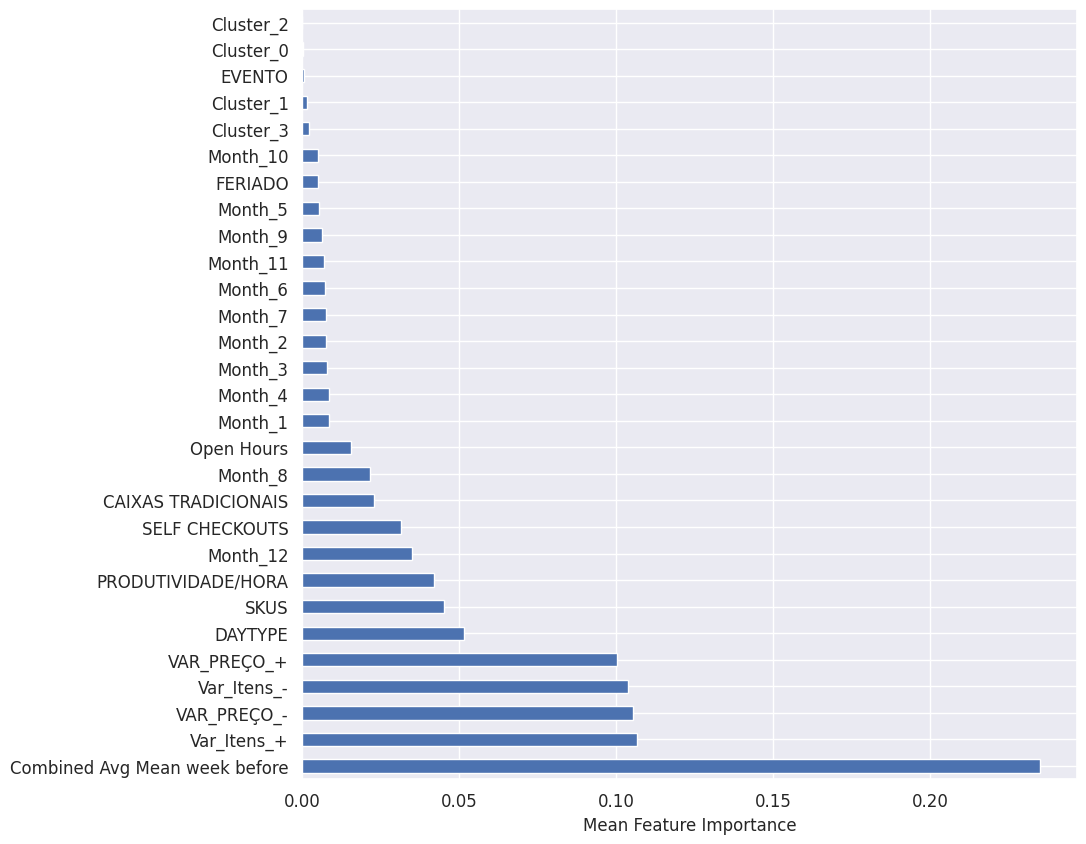

In [ ]:
# Bar chart Features importances of the Decision Tree Classifier Model
plt.figure(figsize=(10, 10))
(pd.Series(model_DTC.feature_importances_, index=X_train.columns)
   .nlargest(X_train.columns.shape[0])
   .plot(kind='barh'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Mean Feature Importance', fontsize=12)
plt.show()



---



## 3.3. Random Forest Classifier Algorithm

In [ ]:
model_RFC = RandomForestClassifier(random_state=42)

In [ ]:
# Fit Random Forest Classifier Algorithm
model_RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions of the Random Forest Classifier Algorithm
predictions_RFC = model_RFC.predict(X_valid)

# Accuracies of the Random Forest Classifier Algorithm
acuracy_RFC = accuracy_score(y_valid, predictions_RFC)
print("Acuracy of the Random Forest Classifier Algorithm:", acuracy_RFC)
print(classification_report(y_valid, predictions_RFC))

Acuracy of the Random Forest Classifier Algorithm: 0.7493081671751933
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7033
           1       0.75      0.75      0.75      7060

    accuracy                           0.75     14093
   macro avg       0.75      0.75      0.75     14093
weighted avg       0.75      0.75      0.75     14093



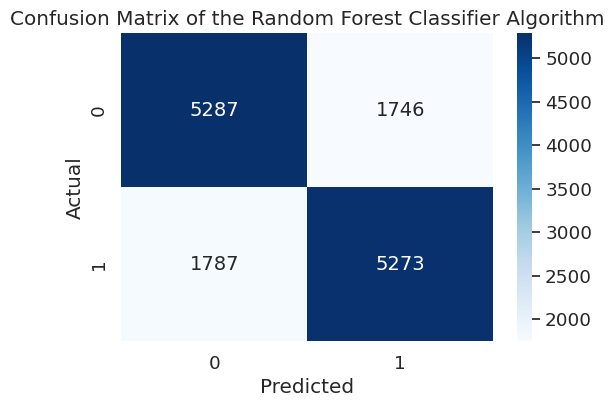

In [ ]:
# Confusion Matrix of the Random Forest Classifier Algorithm
data = confusion_matrix(y_valid, predictions_RFC)
df_cm = pd.DataFrame(data, columns=np.unique(y_valid), index = np.unique(y_valid))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 14}, fmt='d')
plt.title('Confusion Matrix of the Random Forest Classifier Algorithm')
plt.show()

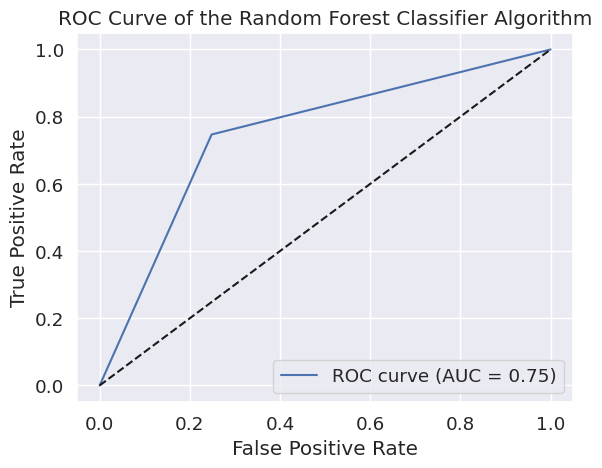

AUC Random Forest Classifier: 0.7493128207007917


In [ ]:
# ROC Curve and Accuracy graph of the Random Forest Classifier Algorithm
fpr, tpr, thresholds = metrics.roc_curve(y_valid, predictions_RFC, pos_label=1)

auc_RFC = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Random Forest Classifier Algorithm')

plt.legend(loc='lower right')
plt.show()

# Print AUC
print('AUC Random Forest Classifier:', auc_RFC)



---



## 3.4. K Neighbors Classifier Algorithm

In [ ]:
model_KNC = KNeighborsClassifier()

In [ ]:
# Fit K Neighbors Classifier Algorithm
model_KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions of the K Neighbors Classifier Algorithm
predictions_KNC = model_KNC.predict(X_valid)

# Accuracies of the K Neighbors Classifier Algorithm
acuracy_KNC = accuracy_score(y_valid, predictions_KNC)
print("Acuracy of the K Neighbors Classifier:", acuracy_KNC)
print(classification_report(y_valid, predictions_KNC))

Acuracy of the K Neighbors Classifier: 0.6523806144894628
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      7033
           1       0.65      0.65      0.65      7060

    accuracy                           0.65     14093
   macro avg       0.65      0.65      0.65     14093
weighted avg       0.65      0.65      0.65     14093



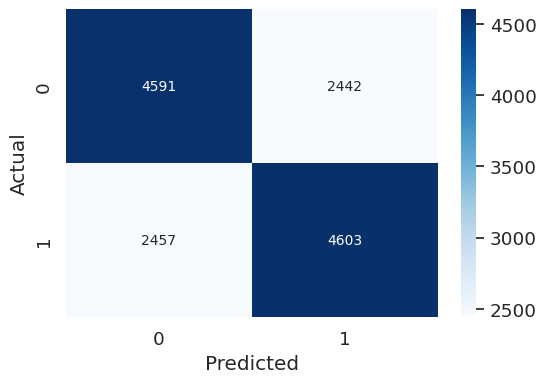

In [ ]:
# Confusion Matrix of the K Neighbors Classifier Algorithm
data = confusion_matrix(y_valid, predictions_KNC)
df_cm = pd.DataFrame(data, columns=np.unique(y_valid), index = np.unique(y_valid))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt='d')
plt.show()

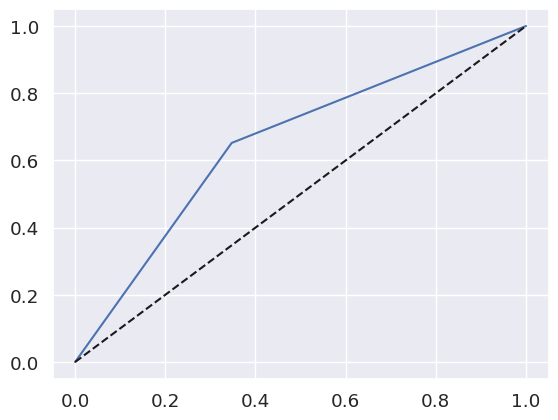

AUC K Neighbors Classifier: 0.6523813777138854


In [ ]:
# ROC Curve and Accuracy graph of the K Neighbors Classifier Algorithm
fpr, tpr, thresholds = metrics.roc_curve(y_valid, predictions_KNC, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# Print AUC
auc_KNC = np.trapz(tpr,fpr)
print('AUC K Neighbors Classifier:', auc_KNC)



---



## 3.5. Logistic Regression Algorithm

In [ ]:
model_LR = LogisticRegression(random_state=42)

In [ ]:
# Fit Logistic Regression Algorithm
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predictions of the Logistic Regression Algorithm
predictions_LR = model_LR.predict(X_valid)

# Accuracies of the Logistic Regression Algorithm
acuracy_LR = accuracy_score(y_valid, predictions_LR)
print("Acuracy of the Logistic Regression Algorithm:", acuracy_LR)
print(classification_report(y_valid, predictions_LR))

Acuracy of the Logistic Regression Algorithm: 0.6170439225147236
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      7033
           1       0.62      0.59      0.61      7060

    accuracy                           0.62     14093
   macro avg       0.62      0.62      0.62     14093
weighted avg       0.62      0.62      0.62     14093



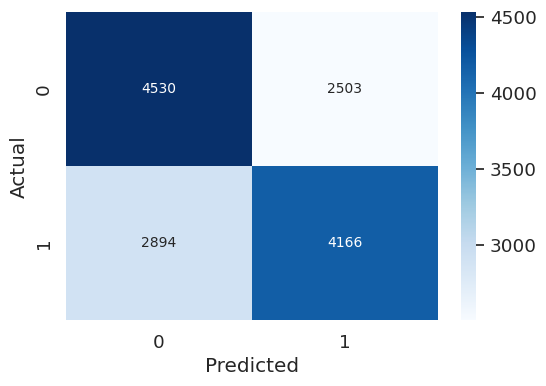

In [ ]:
# Confusion Matrix of the Logistic Regression Algorithm
data = confusion_matrix(y_valid, predictions_LR)
df_cm = pd.DataFrame(data, columns=np.unique(y_valid), index = np.unique(y_valid))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt='d')
plt.show()

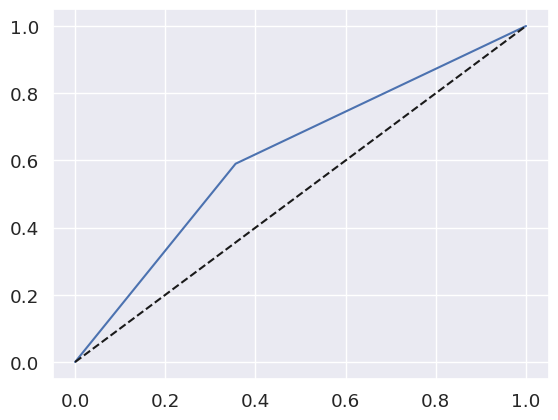

AUC Logistic Regression: 0.6170956707935757


In [ ]:
# ROC Curve and Accuracy graph of the Logistic Regression Algorithm
fpr, tpr, thresholds = metrics.roc_curve(y_valid, predictions_LR, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# Print AUC
auc_LR = np.trapz(tpr,fpr)
print('AUC Logistic Regression:', auc_LR)



---



## 3.6. Gradient Boosting Classifier Algorithm

In [ ]:
model_GBC = GradientBoostingClassifier(random_state=42)

In [ ]:
# Fit Gradient Boosting Classifier Algorithm
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions of the Gradient Boosting Classifier Algorithm
predictions_GBC = model_GBC.predict(X_valid)

# Accuracies of the Gradient Boosting Classifier Algorithm
acuracy_GBC = accuracy_score(y_valid, predictions_GBC)
print("Acuracy of the Gradient Boosting Classifier Algorithm :", acuracy_GBC)
print(classification_report(y_valid, predictions_GBC))

Acuracy of the Gradient Boosting Classifier Algorithm : 0.7276662172709856
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7033
           1       0.73      0.72      0.73      7060

    accuracy                           0.73     14093
   macro avg       0.73      0.73      0.73     14093
weighted avg       0.73      0.73      0.73     14093



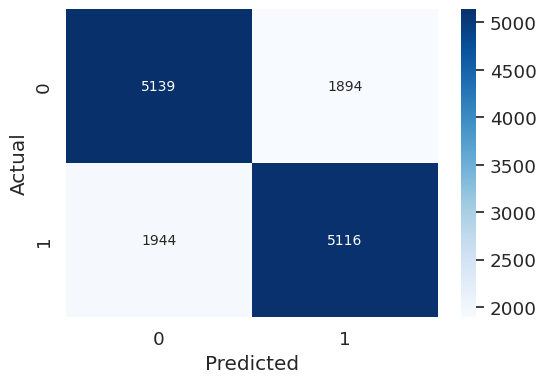

In [ ]:
# Confusion Matrix of the Gradient Boosting Classifier Algorithm
data = confusion_matrix(y_valid, predictions_GBC)
df_cm = pd.DataFrame(data, columns=np.unique(y_valid), index = np.unique(y_valid))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt='d')
plt.show()

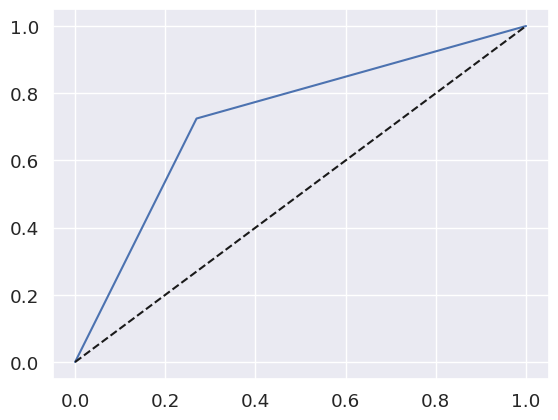

AUC Gradient Boosting Classifier: 0.727672014851878


In [ ]:
# ROC Curve and Accuracy graph of the Gradient Boosting Classifier Algorithm
fpr, tpr, thresholds = metrics.roc_curve(y_valid, predictions_GBC, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# Print AUC
auc_GBC = np.trapz(tpr,fpr)
print('AUC Gradient Boosting Classifier:', auc_GBC)



---



## 4. Cross Validation - k-Fold validation

In [ ]:
# List of algorithms
models = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), GradientBoostingClassifier()]

In [ ]:
# Data to the Cross Validation
X_data = np.concatenate([X_train, X_valid], axis=0)
y_data = np.concatenate([y_train, y_valid], axis=0)

In [ ]:
# Compare the accuracies of the diferent algorithms
def compare_models_cross_validation(models,X,Y):
  for model in models:
    cv_score = cross_val_score(model, X,Y)
    mean_accuracy = round(np.mean(cv_score),2)*100

    print('Mean Cross Validation Accuracy for ', model, '= ', mean_accuracy)

In [ ]:
compare_models_cross_validation(models,X_data,y_data)

Mean Cross Validation Accuracy for  DecisionTreeClassifier() =  68.0
Mean Cross Validation Accuracy for  RandomForestClassifier() =  75.0
Mean Cross Validation Accuracy for  KNeighborsClassifier() =  65.0
Mean Cross Validation Accuracy for  LogisticRegression() =  62.0
Mean Cross Validation Accuracy for  GradientBoostingClassifier() =  73.0


In [ ]:
print('Decision Tree Classifier accuracy: {}'.format(round(acuracy_DTC, 2)*100))
print('Random Forest Classifier accuracy: {}'.format(round(acuracy_RFC, 2)*100))
print('K Neighbors Classifier accuracy: {}'.format(round(acuracy_KNC, 2)*100))
print('Logistic Regression accuracy:  {}'.format(round(acuracy_LR, 2)*100))
print('Gradient Boosting Classifier accuracy {}'.format(round(acuracy_GBC, 2)*100))

Decision Tree Classifier accuracy: 68.0
Random Forest Classifier accuracy: 75.0
K Neighbors Classifier accuracy: 65.0
Logistic Regression accuracy:  62.0
Gradient Boosting Classifier accuracy 73.0




---



## 5. Compare Algorithms and choose the best one

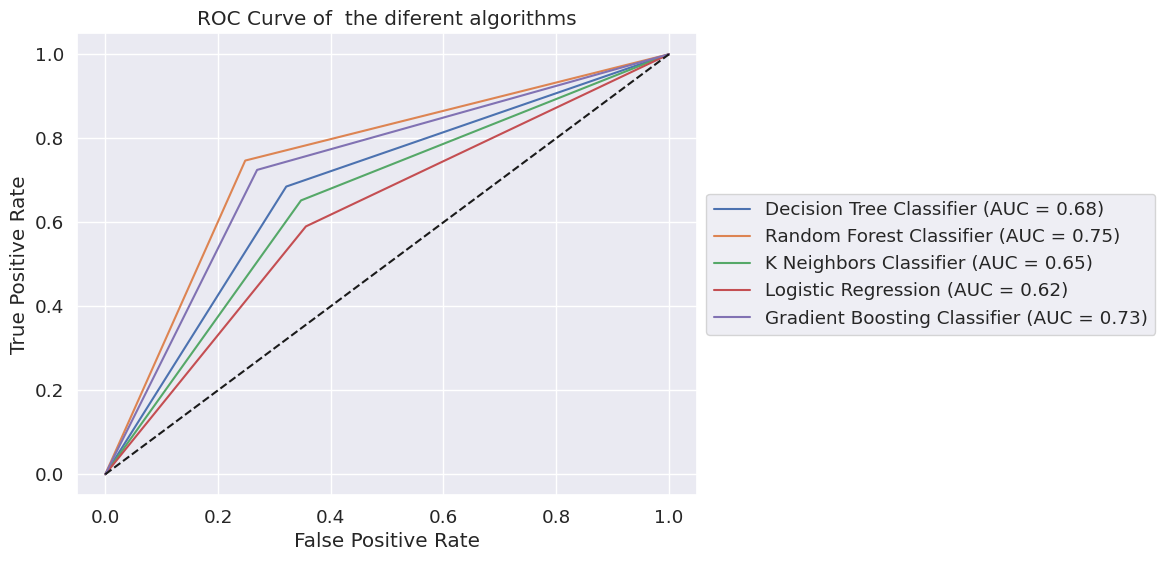

In [ ]:
# Compare ROC Curve of the 5 Algorithms
predictions = [predictions_DTC, predictions_RFC, predictions_KNC, predictions_LR, predictions_GBC]
aucs = [auc_DTC, auc_RFC, auc_KNC, auc_LR, auc_GBC]
models = ['Decision Tree Classifier', 'Random Forest Classifier', 'K Neighbors Classifier', 'Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(8, 6))

for prediction, auc, model in zip(predictions, aucs, models):
    fpr, tpr, thresholds = metrics.roc_curve(y_valid, prediction, pos_label=1)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of  the diferent algorithms')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

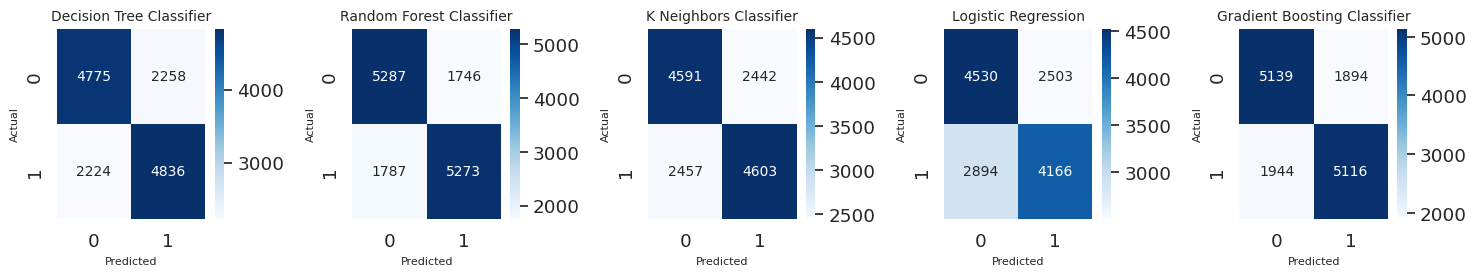

In [ ]:
# Compare Confusion Matrix of the 5 Algorithms
predictions = [predictions_DTC, predictions_RFC, predictions_KNC, predictions_LR, predictions_GBC]
models = ['Decision Tree Classifier', 'Random Forest Classifier', 'K Neighbors Classifier', 'Logistic Regression', 'Gradient Boosting Classifier']

fig, axes = plt.subplots(1, len(predictions), figsize=(15, 3))

for i, (prediction, model) in enumerate(zip(predictions, models)):
    data = confusion_matrix(y_valid, prediction)
    df_cm = pd.DataFrame(data, columns=np.unique(y_valid), index=np.unique(y_valid))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.2)
    sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt='d', ax=axes[i])

    axes[i].set_title(model, fontsize=10)

    axes[i].set_xlabel('Predicted', fontsize=8)
    axes[i].set_ylabel('Actual', fontsize=8)

plt.tight_layout()
plt.show()

The Algorithm with the best performance for our data is Random Forest Classifier.



---



## 6. Fine Tuning best Algorithm



## 6.1. Grid Search

In [ ]:
# Default params of the Random Forest Classifier Model
model_RFC.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Most commun params of the Random Forest Classifier Algorithm
N_ESTIMATORS = [170, 200]
MAX_DEPTH = [28, 30]
MIN_SAMPLES_LEAF = [5, 6]

In [ ]:
parameters = {'n_estimators': N_ESTIMATORS,
              'max_depth': MAX_DEPTH,
              'min_samples_leaf': MIN_SAMPLES_LEAF}

In [ ]:
# Grid Search of the Random Forest Classifier Model
model_RFC_grid = GridSearchCV(model_RFC, parameters, cv=5, scoring="accuracy")

In [ ]:
# Fit the Random Forest Classifier Model
model_RFC_grid.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [28, 30], 'min_samples_leaf': [5, 6],
                         'n_estimators': [170, 200]},
             scoring='accuracy')

In [ ]:
# Check the best params of the Random Forest Classifier Model
model_RFC_grid.best_params_

{'max_depth': 28, 'min_samples_leaf': 6, 'n_estimators': 200}

In [ ]:
# Best Random Forest Classifier Model accuracy - 0.7568339414274273 {'max_depth': 28, 'min_samples_leaf': 6, 'n_estimators': 200}
model_RFC_grid.best_score_

0.7568339414274273

In [ ]:
best_model = model_RFC_grid.best_estimator_

In [ ]:
# Best model with the hyperparameters
best_model

RandomForestClassifier(max_depth=28, min_samples_leaf=6, n_estimators=200,
                       random_state=42)

In [ ]:
#best_model.feature_importances_

In [ ]:
# Features importances of the Model
imp = list(zip(X_train, best_model.feature_importances_))

imp_sorted = sorted(imp, key=lambda x: x[1], reverse=True)
for feature, importance in imp_sorted:
    print(f'{feature}: {importance:.4f}')

Combined Avg Mean week before: 0.2463
DAYTYPE: 0.1211
Var_Itens_+: 0.0669
Var_Itens_-: 0.0669
PRODUTIVIDADE/HORA: 0.0632
VAR_PREÇO_-: 0.0625
VAR_PREÇO_+: 0.0619
SKUS: 0.0600
CAIXAS TRADICIONAIS: 0.0423
Month_12: 0.0364
SELF CHECKOUTS: 0.0298
Open Hours: 0.0280
Month_8: 0.0262
Cluster_0: 0.0107
Month_1: 0.0090
Month_3: 0.0080
Month_7: 0.0077
Cluster_3: 0.0076
Month_2: 0.0071
Month_4: 0.0058
Month_5: 0.0048
Month_10: 0.0047
Month_9: 0.0044
FERIADO: 0.0042
Cluster_1: 0.0041
Month_6: 0.0039
Month_11: 0.0039
EVENTO: 0.0014
Cluster_2: 0.0011


In [ ]:
# Bar chart Features importances of the Model
plt.figure(figsize=(10, 10))
(pd.Series(best_model.feature_importances_, index=X_train.columns)
   .nlargest(X_train.columns.shape[0])
   .plot(kind='barh'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Mean Feature Importance', fontsize=12)
plt.show()

## 6.2. Evaluate our best model

In [ ]:
# Best predictions
best_predictions= best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Accuracies of the Best Model
best_acuracy = accuracy_score(y_test, best_predictions)
print("Acuracy of the best model:", best_acuracy)
print(classification_report(y_test, best_predictions))

Acuracy of the best model: 0.7617256794153126
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      7026
           1       0.77      0.76      0.76      7067

    accuracy                           0.76     14093
   macro avg       0.76      0.76      0.76     14093
weighted avg       0.76      0.76      0.76     14093



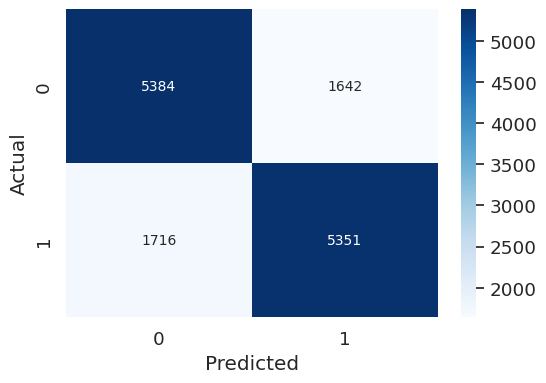

In [ ]:
# Confusion Matrix of the Best Model
data = confusion_matrix(y_test, best_predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt='d')
plt.show()

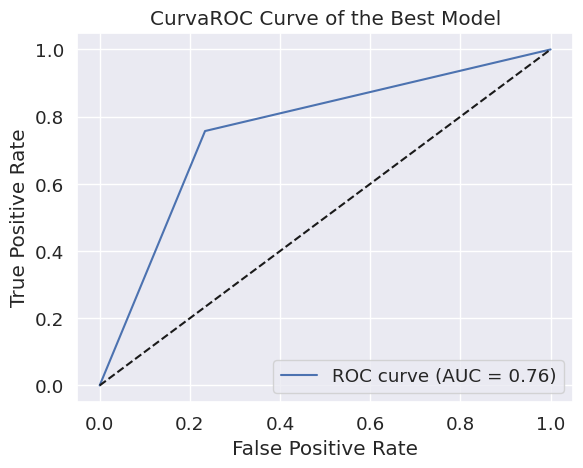

AUC Best Model: 0.7617389388082535


In [ ]:
# ROC Curve and Accuracy graph of the Best Model
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_predictions, pos_label=1)

auc_RFC = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CurvaROC Curve of the Best Model')

plt.legend(loc='lower right')
plt.show()

# Print AUC
print('AUC Best Model:', auc_RFC)



---



In [ ]:
probabilities = best_model.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


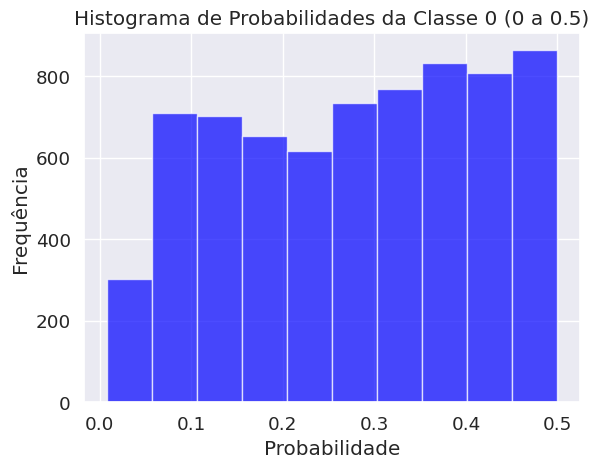

In [ ]:
#Histogram for Class 0
prob_class_0 = probabilities[:, 0]
filtered_prob_class_0 = prob_class_0[(prob_class_0 >= 0) & (prob_class_0 <= 0.5)]


plt.hist(filtered_prob_class_0, bins=10, color='blue', alpha=0.7)
plt.title('Histograma de Probabilidades da Classe 0 (0 a 0.5)')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

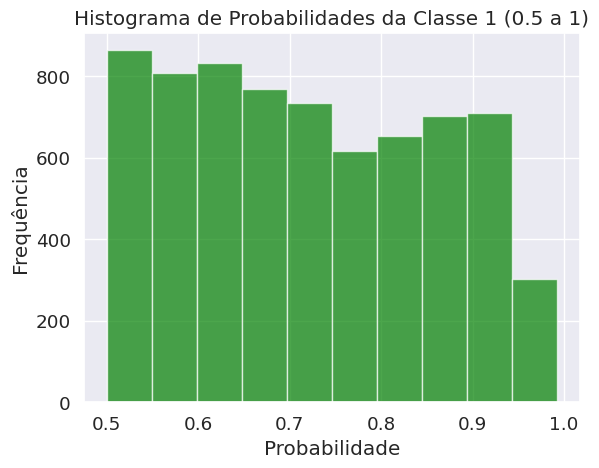

In [ ]:
#Histogram for Class 1
prob_class_1 = probabilities[:, 1]
filtered_prob_class_1 = prob_class_1[(prob_class_1 >= 0.5) & (prob_class_1 <= 1)]

# Plotar o histograma
plt.hist(filtered_prob_class_1, bins=10, color='green', alpha=0.7)
plt.title('Histograma de Probabilidades da Classe 1 (0.5 a 1)')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## 7. Final Preditions

In [ ]:
best_predictions

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
final_df_predictions = X_test

In [ ]:
final_df_predictions['Above Median'] = y_test

final_df_predictions['Predictions'] = best_predictions

final_df_predictions

,VAR_PREÇO_+,VAR_PREÇO_-,DAYTYPE,PRODUTIVIDADE/HORA,SKUS,CAIXAS TRADICIONAIS,SELF CHECKOUTS,Open Hours,FERIADO,EVENTO,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Above Median,Predictions
36916,0.394728,-0.692414,-0.864142,-0.902564,-0.623139,0.008115,-0.608703,-0.232084,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532,NaN,0
79656,0.869765,-0.704297,-0.864142,-0.337928,-0.161912,-1.163242,-0.037631,0.750126,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532,NaN,0
627,-0.177285,-0.774091,-0.864142,-0.055610,-0.171903,-0.284724,-0.037631,1.077529,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,3.216654,-0.315064,-0.265348,-0.265532,NaN,0
35366,0.707209,0.084427,1.157217,-0.788000,-0.589835,0.740213,-0.608703,-1.541696,-0.108392,-0.054575,...,-0.311109,3.228856,-0.316531,-0.312424,-0.310882,-0.315064,-0.265348,-0.265532,1.0,1
71648,1.367239,0.034311,1.157217,0.128511,1.965860,-0.138305,0.343084,0.422723,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,3.768632,-0.265532,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27701,-0.775906,-0.468480,-0.864142,0.251258,-0.620475,0.008115,-0.608703,-1.541696,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,3.768632,-0.265532,NaN,1
46532,-0.902983,2.351566,1.157217,-0.816641,-0.640605,0.008115,-0.608703,-0.886890,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,3.200782,-0.310882,-0.315064,-0.265348,-0.265532,NaN,0
28053,0.797678,0.096875,1.157217,0.251258,-0.620475,0.008115,-0.608703,-1.541696,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,-0.315064,3.768632,-0.265532,NaN,0
81885,-0.330344,-0.512171,1.157217,0.987739,-0.105665,-1.309662,0.152726,1.077529,-0.108392,-0.054575,...,-0.311109,-0.309707,-0.316531,-0.312424,-0.310882,3.173960,-0.265348,-0.265532,NaN,1


In [ ]:
final_df.to_excel('/content/drive/MyDrive/Ficheiros Finais/Modelo de Classificação Final/Final_predictions.xlsx', index=True)